## 1、什么是线性回归？
- 线性：两个变量之间的关系是一次函数关系的
- 非线性：两个变量之间的关系不是一次函数关系的

## 2、应用场景
- 房价预测
- 流量预测
- 票房预测
- ....

## 3、表达式&优化函数
- 表达式:
$$Y = wx +b $$

w是x的系数，b是偏置项

- 目标函数（Loss Function）
$$ J= \frac{1}{2m} \sum_{m}^{i=1}{(\acute{y}-y)}^2$$

- 利用梯度下降法求 J 的最小值，从而推导出w和b

## 4、为什么需要正则化

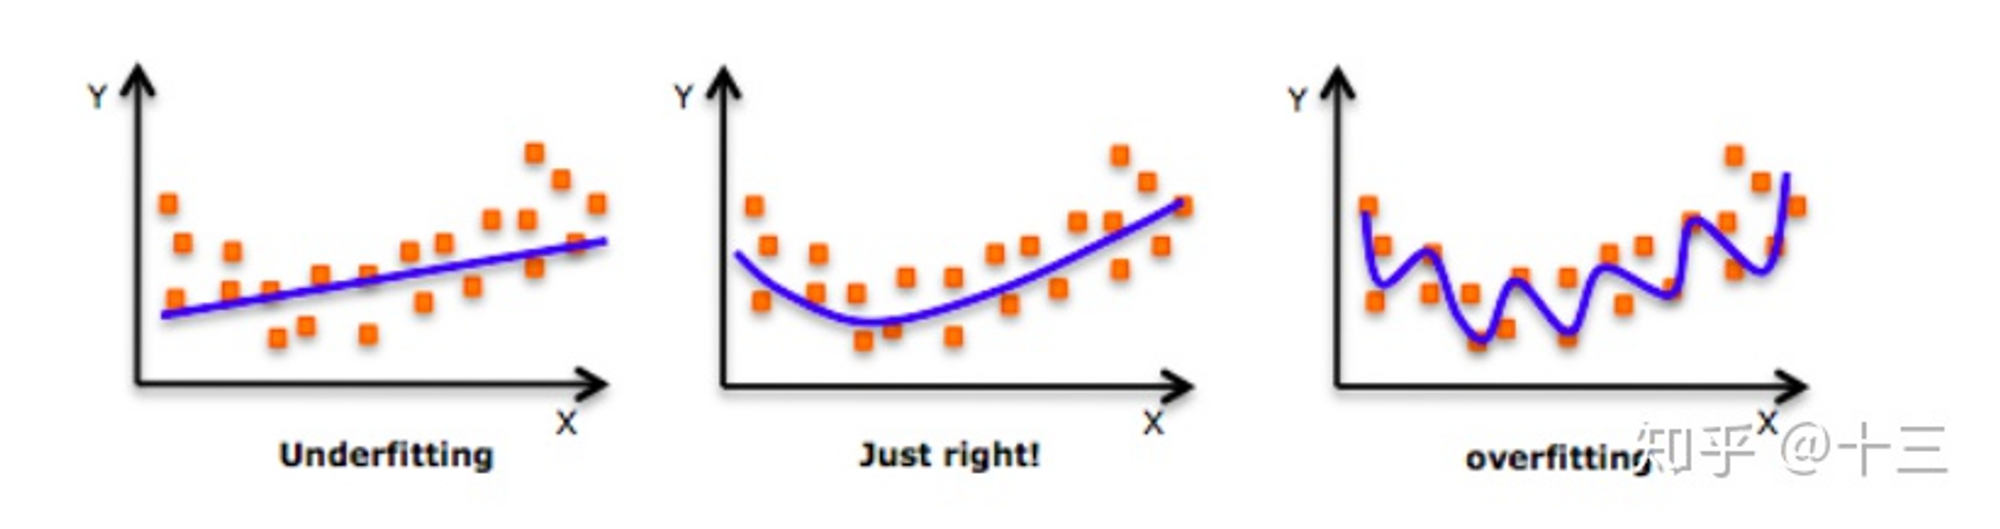

### L1正则化(Lasso回归)

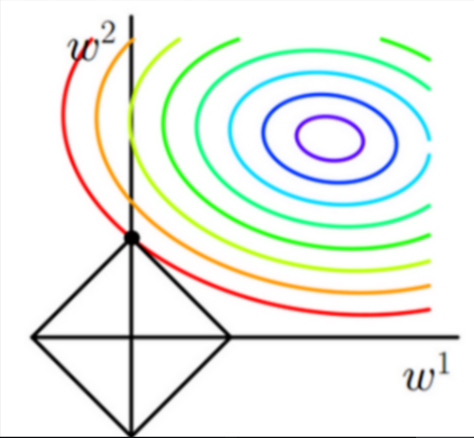

L1正则化项： $$ J=J_0 + \lambda \sum_{w}^{}{} \lvert w \rvert $$

#### L1如何解决过拟合问题
- 特征稀疏性

### L2正则化(岭回归)

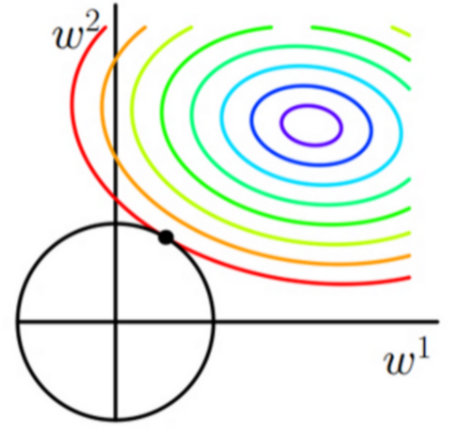


L2正则化项： $$ J=J_0 + \lambda \sum_{w}^{}{} w^2 $$

#### L2如何解决过拟合问题
- 拟合过程中通常都倾向于让权值尽可能小
- 参数很小，数据偏移得多一点也不会对结果造成什么影响，鲁棒性更强
- 参数:$$\lambda = 0.01 $$

## 代码实现：房价回归预测-LinearRegression

In [2]:
# encoding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# 1.获取数据集
boston_data = load_boston()
x = pd.DataFrame(boston_data.data) # 波士顿房价data
y = boston_data.target             # 波士顿房价真实值
x.columns = boston_data.feature_names # 特征赋值


In [4]:
#特征14个：
#CRIM: 城镇人均犯罪率
#ZN: 住宅用地所占比例
#INDUS: 城镇中非住宅用地所占比例
#CHAS: 虚拟变量,用于回归分析
#NOX: 环保指数
#RM: 每栋住宅的房间数
#AGE: 1940 年以前建成的自住单位的比例
#DIS: 距离 5 个波士顿的就业中心的加权距离
#RAD: 距离高速公路的便利指数
#TAX: 每一万美元的不动产税率
#PTRATIO: 城镇中的教师学生比例
#B: 城镇中的黑人比例
#LSTAT: 地区中有多少房东属于低收入人群
#MEDV: 自住房屋房价中位数（也就是均价）

x.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
# 2.划分训练集、测试集
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=125)
# 3.建立线性回归模型
model = LinearRegression().fit(xtrain,ytrain)
# 4.1 获取预测值
y_pred = model.predict(xtest)

In [6]:
# 4.2 获取回归系数
y_w = model.coef_
y_w

array([-1.14077285e-01,  4.87165173e-02, -1.20875379e-02,  1.59355488e+00,
       -1.89792822e+01,  3.47313008e+00,  3.03276293e-03, -1.60090878e+00,
        2.90563127e-01, -1.27238844e-02, -9.76743908e-01,  8.48566379e-03,
       -4.87508387e-01])

In [7]:
# 4.3 获取截距
y_w0 = model.intercept_ 
y_w0

40.44599864104647

In [8]:
# 4.4 将回归系数与特征对应
compare_feature = [*zip(xtrain.columns,y_w)]
compare_feature

[('CRIM', -0.11407728518733692),
 ('ZN', 0.04871651733969727),
 ('INDUS', -0.012087537917785052),
 ('CHAS', 1.5935548762536438),
 ('NOX', -18.97928220894716),
 ('RM', 3.4731300808153214),
 ('AGE', 0.0030327629267113626),
 ('DIS', -1.6009087800054767),
 ('RAD', 0.29056312669900103),
 ('TAX', -0.01272388444870162),
 ('PTRATIO', -0.976743908479199),
 ('B', 0.008485663789765877),
 ('LSTAT', -0.48750838710289024)]

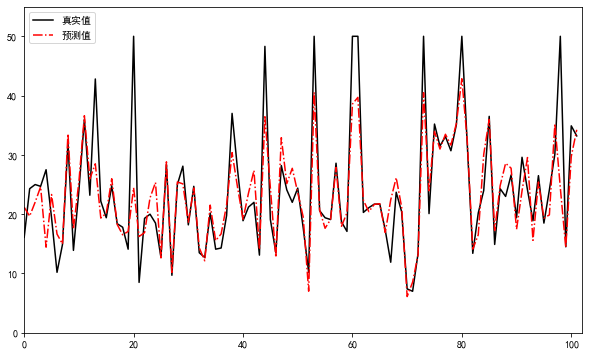

In [21]:
# 5.预测结果可视化
plt.rcParams['font.sans-serif'] = 'SimHei'
fig = plt.figure(figsize=(10,6))
plt.plot(range(ytest.shape[0]),ytest,color='black',linestyle='-',linewidth=1.5)
plt.plot(range(y_pred.shape[0]),y_pred,color='red',linestyle='-.',linewidth=1.5)
plt.xlim((0,102))
plt.ylim((0,55))
plt.legend(['真实值','预测值'])
plt.show()
